# Load the database
https://www.kaggle.com/msambare/fer2013

In [2]:
import matplotlib.pyplot as plt
path="database/train/happy/Training_430147.jpg"
img = plt.imread(path)

In [3]:
img

array([[118, 133, 123, ..., 143, 129, 124],
       [128, 118, 137, ..., 138, 126, 118],
       [125,  91, 121, ..., 141, 114, 118],
       ...,
       [ 23,  17,  16, ...,  11,  19,  15],
       [ 20,  17,  23, ...,  12,  16,  27],
       [ 19,  12,  21, ...,  16,  18,  30]], dtype=uint8)

In [6]:
import os
path="database/train/"
folders=os.listdir(path)
print(folders)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [7]:
import matplotlib.pyplot as plt
import os
# from datetime import datetime
import numpy as np


# now = datetime.now()
# current_time = now.strftime("%H:%M:%S")
# print("Current Time =", current_time)

lable_list=[] # save the emotion lable  [0 'angry', 1'disgust', 2'fear', 3'happy', 4'neutral', 5'sad', 6'surprise']
imgs=[] #save the imamges

for i in range(len(folders)):
    path_emotion=path+folders[i]
    filenames=sorted(os.listdir(path_emotion))      
    #print("..................")
    #print(filenames)
    for j in range(len(filenames)):
        lable_list.append(i)
        img=plt.imread(path_emotion+"/"+filenames[j])
        imgs.append(img)
# now = datetime.now()
# current_time = now.strftime("%H:%M:%S")
# print("Current Time =", current_time)

In [8]:
imgs_np=np.array(imgs)
imgs_np.shape

(28709, 48, 48)

In [9]:
print("train/angry number: ",lable_list.count(0))
print("train/disgust number: ",lable_list.count(1))
print("train/fear number: ",lable_list.count(2))
print("train/happy number: ",lable_list.count(3))
print("train/neutral number: ",lable_list.count(4))
print("train/sad number: ",lable_list.count(5))
print("train/surprise number: ",lable_list.count(6))
lable_np=np.array(lable_list)

lable_np.shape

train/angry number:  3995
train/disgust number:  436
train/fear number:  4097
train/happy number:  7215
train/neutral number:  4965
train/sad number:  4830
train/surprise number:  3171


(28709,)

train/angry/Training_10131352.jpg is a black image. please delete it. Even though you keep it, it is ok.

angry
train/angry/Training_10120469.jpg
train/angry/Training_10131352.jpg
train/angry/Training_10161559.jpg
train/angry/Training_1021836.jpg
train/angry/Training_10269675.jpg
disgust
train/disgust/Training_10598340.jpg
train/disgust/Training_1070239.jpg
train/disgust/Training_11050021.jpg
train/disgust/Training_11550217.jpg
train/disgust/Training_11652168.jpg
fear
train/fear/Training_10031494.jpg
train/fear/Training_10110501.jpg
train/fear/Training_10117992.jpg
train/fear/Training_10126156.jpg
train/fear/Training_10127393.jpg
happy
train/happy/Training_10046809.jpg
train/happy/Training_10066226.jpg
train/happy/Training_10070997.jpg
train/happy/Training_10080933.jpg
train/happy/Training_10109375.jpg
neutral
train/neutral/Training_10031781.jpg
train/neutral/Training_10055498.jpg
train/neutral/Training_10059941.jpg
train/neutral/Training_10078021.jpg
train/neutral/Training_10081559.jpg
sad
train/sad/Training_10031481.jpg
train/sad/Training_10048646.jpg
train/sad/Training_10057152.jpg
trai

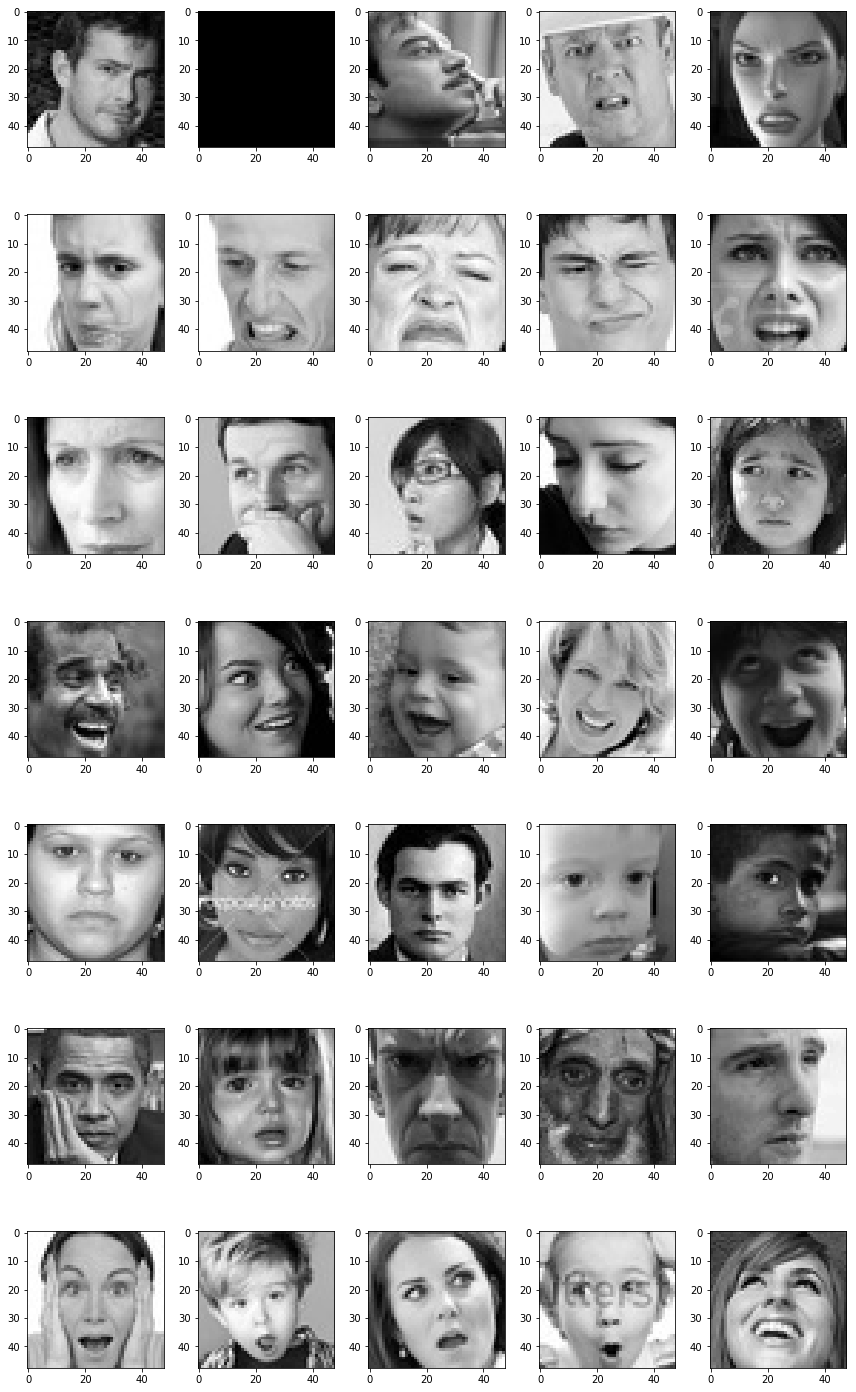

In [14]:
import matplotlib.pyplot as plt
import os

plt.figure(0, figsize=(12,20))
fig_no = 0
for expression in os.listdir("database/train/"):
    print(expression)
    for i in range(1,6):
        fig_no = fig_no + 1
        plt.subplot(7,5,fig_no)
        print("train/" + expression + "/" +os.listdir("database/train/" + expression)[i])
        img = plt.imread("database/train/" + expression + "/" +os.listdir("database/train/" + expression)[i])
        plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()


# Local Binary Patterns (LBP) 
https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern

In [15]:
img

array([[ 53,  76,  80, ...,  89,  91,  97],
       [ 65,  74,  84, ...,  83,  81,  90],
       [ 77,  81,  77, ...,  86,  93,  97],
       ...,
       [112, 106, 112, ...,  73,  46,  71],
       [116, 118, 108, ...,  73,  45,  75],
       [120, 128, 101, ...,  66,  44,  78]], dtype=uint8)

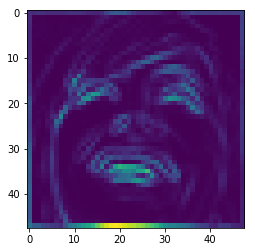

In [16]:
import skimage.feature
import numpy
import matplotlib.pyplot as plt

img_lbp = skimage.feature.local_binary_pattern(img, 8,1.0,method='var')
# numpy historgram operation
plt.imshow(img_lbp)
plt.show()

# KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline
print(__doc__)

The iris dataset is a classic and very easy multi-class classification dataset.
======================================
|class|Samples per class|Dimension
|----|----|----|
|3|50|4|

In [4]:
n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]


In [5]:
print(X[1,:],y[1])

[4.9 1.4] 0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

h = .01  # step size in the mesh

In [14]:
print('x_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

x_train_shape (45, 2)
X_test_shape (105, 2)
y_train_shape (45,)
y_test_shape (105,)


In [15]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

names = ['KNN', 'NCA, KNN']

classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ])
               ]

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

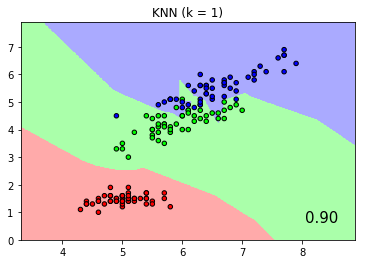

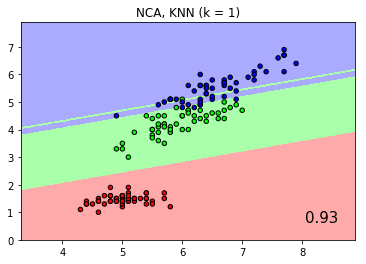

In [17]:
for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()